In [4]:
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
CPI=ts.get_cpi()
print(CPI.head())

    month     cpi
0  2019.7  102.80
1  2019.6  102.68
2  2019.5  102.74
3  2019.4  102.54
4  2019.3  102.28


In [6]:
CPI=ts.get_cpi()
CPI=CPI.sort_values('month')
CPI['cpi']=CPI['cpi']-100.0
CPI.to_csv("e:/programdata/cpi.csv")

Text(0.5, 1.0, 'CPI月度对比')

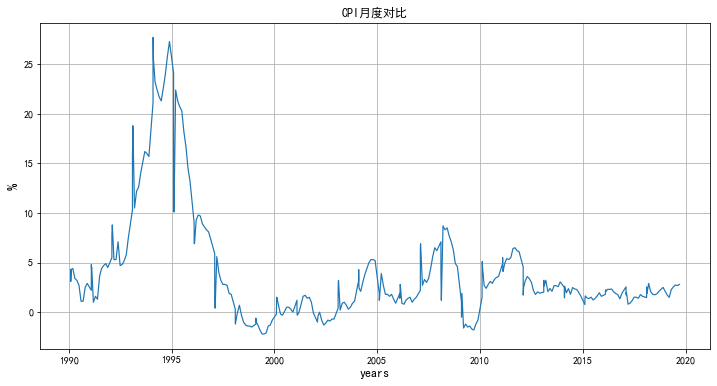

In [7]:
df=pd.read_csv("e:/programdata/cpi.csv")
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize=(12,6))
plt.plot(df["month"],df["cpi"],linewidth=1.2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('years',size=12)
plt.ylabel('%',size=15)
plt.title('CPI月度对比',size=12)

In [8]:
money_supply=ts.get_money_supply()
money_supply.tail(10)

,month,m2,m2_yoy,m1,m1_yoy,m0,m0_yoy,cd,cd_yoy,qm,qm_yoy,ftd,ftd_yoy,sd,sd_yoy,rests,rests_yoy
489,1978.10,--,--,778.64,--,185.24,--,--,--,--,--,--,--,--,--,--,--
490,1978.9,--,--,763.47,--,188.27,--,--,--,--,--,--,--,--,--,--,--
491,1978.8,--,--,755.99,--,182.12,--,--,--,--,--,--,--,--,--,--,--
492,1978.7,--,--,746.43,--,181.02,--,--,--,--,--,--,--,--,--,--,--
493,1978.6,--,--,745.08,--,178.46,--,--,--,--,--,--,--,--,--,--,--
494,1978.5,--,--,757.93,--,182.17,--,--,--,--,--,--,--,--,--,--,--
495,1978.4,--,--,808.17,--,192.63,--,--,--,--,--,--,--,--,--,--,--
496,1978.3,--,--,827.83,--,194.86,--,--,--,--,--,--,--,--,--,--,--
497,1978.2,--,--,833.35,--,205.89,--,--,--,--,--,--,--,--,--,--,--
498,1978.1,--,--,870.53,--,229.59,--,--,--,--,--,--,--,--,--,--,--


In [10]:
money_supply=money_supply.sort_values('month').iloc[228:,:]
money_supply.to_csv("e:/programdata/moneysupply.csv")


In [11]:
date=pd.date_range('1997-1-1',periods=len(money_supply),freq='M')
df=pd.read_csv("e:/programdata/moneysupply.csv")
df.index=date
df=df.iloc[:,2:8]
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
df.rename(columns={'m2_yoy':'M2增长率','m1_yoy':'M1增长率','m0_yoy':'M0增长率'},inplace=True)
df.head()

,m2,M2增长率,m1,M1增长率,m0,M0增长率
1997-01-31,78648.0,34.67,30573.0,21.35,11493.00,33.64
1997-02-28,86644.0,18.44,32422.0,20.99,9489.00,12.90
1997-03-31,87590.0,18.14,32909.0,20.01,9784.58,12.40
1997-04-30,90995.3,19.60,34826.3,22.10,10177.60,15.60
1997-05-31,78998.0,23.86,29103.0,15.23,10080.00,8.38


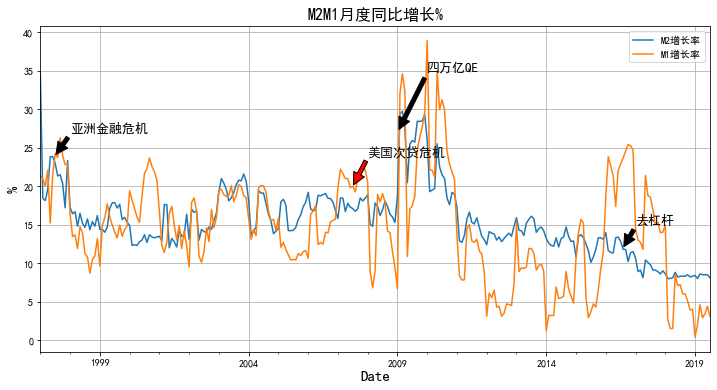

In [23]:
df[["M2增长率","M1增长率"]].plot(figsize=(12,6))
plt.xlabel('Date',size=15)
plt.ylabel('%',size=15)
plt.title('M2M1月度同比增长%',size=16)
plt.annotate('亚洲金融危机',size=13,xy=('1997-7-1',24),xytext=('1998-1-1',27),
            arrowprops=dict(facecolor='black',shrink=0.05),)
plt.annotate('美国次贷危机',size=13,xy=('2007-7-1',20),xytext=('2008-1-1',24),
            arrowprops=dict(facecolor='red',shrink=0.05),)
plt.annotate(u'四万亿QE',size=13,xy=('2009-1-1',27),xytext=('2010-1-1',35),
            arrowprops=dict(facecolor='black',shrink=0.05),)
plt.annotate(u'去杠杆',size=13,xy=('2016-8-1',12),xytext=('2017-1-1',15),
            arrowprops=dict(facecolor='black',shrink=0.05),)
plt.grid(True)

In [27]:
moneysupplyyear=ts.get_money_supply_bal()
moneysupplyyear=moneysupplyyear.sort_values('year')
moneysupplyyear.to_csv("e:\programdata\moneysupplyyear.csv")
gdp=ts.get_gdp_year()
gdp=gdp.sort_values('year')
gdp.to_csv("e:\programdata\gdpyear.csv")
df1=pd.read_csv("e:\programdata\moneysupplyyear.csv")
dateparse=lambda dates:pd.datetime.strptime(dates,'%Y')
df1=pd.read_csv("e:\programdata\moneysupplyyear.csv",parse_dates=['year'],
               index_col='year',date_parser=dateparse)
df2=pd.read_csv("e:\programdata\gdpyear.csv",parse_dates=['year'],
               index_col='year',date_parser=dateparse)
df2=df2[38:]
df3=pd.DataFrame()
df3["M2/GDP"]=df1["m2"]/df2["gdp"]
df3["M1/GDP"]=df1["m1"]/df2["gdp"]
df3.head()

,M2/GDP,M1/GDP
year,,
1990-01-01,0.819240,0.372336
1991-01-01,0.888364,0.396359
1992-01-01,0.943495,0.435735
1993-01-01,0.987148,0.460759
1994-01-01,0.973559,0.426174


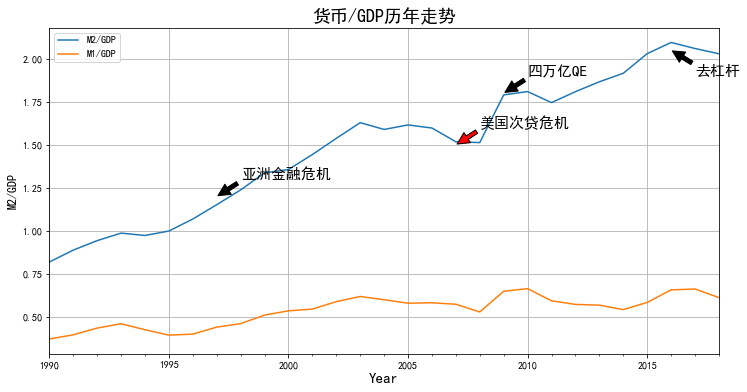

In [29]:
df3[["M2/GDP","M1/GDP"]].plot(figsize=(12,6))
plt.xlabel('Year',size=15)
plt.ylabel('M2/GDP',size=12)
plt.title('货币/GDP历年走势',size=18)
plt.annotate('亚洲金融危机',size=15,xy=('1997-7-1',1.2),xytext=('1998-1-1',1.3),
            arrowprops=dict(facecolor='black',shrink=0.05),)
plt.annotate('美国次贷危机',size=15,xy=('2007-7-1',1.5),xytext=('2008-1-1',1.6),
            arrowprops=dict(facecolor='red',shrink=0.05),)
plt.annotate(u'四万亿QE',size=15,xy=('2009-1-1',1.8),xytext=('2010-1-1',1.9),
            arrowprops=dict(facecolor='black',shrink=0.05),)
plt.annotate(u'去杠杆',size=15,xy=('2016-8-1',2.05),xytext=('2017-1-1',1.9),
            arrowprops=dict(facecolor='black',shrink=0.05),)
plt.grid(True)

In [30]:
gdp_for=ts.get_gdp_for()
gdp_for.head()
gdp_for=gdp_for.sort_values('year')
gdp_for.to_csv("e:/programdata/gdp_for.csv")

In [33]:
dateparse=lambda dates:pd.datetime.strptime(dates,'%Y')
df4=pd.read_csv("e:/programdata/gdp_for.csv",parse_dates=['year'],
               index_col='year',date_parser=dateparse)
df4.rename(columns={'end_for':'消费贡献率',
                   'asset_for':'投资贡献率',
                   'goods_for':'净出口贡献率'},inplace=True)
df4.head()

,Unnamed: 0,消费贡献率,for_rate,投资贡献率,asset_rate,净出口贡献率,goods_rate
year,,,,,,,
1978-01-01,40,39.4,4.6,66.0,7.7,-5.4,-0.6
1979-01-01,39,87.3,6.6,15.4,1.2,-2.7,-0.2
1980-01-01,38,71.8,5.6,26.4,2.1,1.8,0.1
1981-01-01,37,93.4,4.9,-4.3,-0.2,10.9,0.5
1982-01-01,36,64.7,5.9,23.8,2.2,11.5,1.0


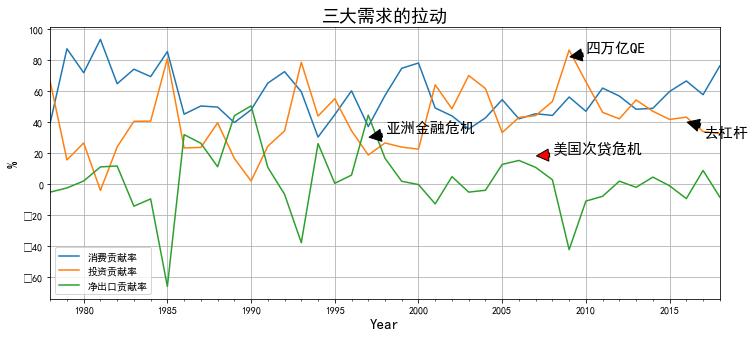

In [35]:
df4[["消费贡献率","投资贡献率","净出口贡献率"]].plot(figsize=(12,5))
plt.xlabel('Year',size=15)
plt.ylabel('%',size=15)
plt.title('三大需求的拉动',size=18)
plt.annotate('亚洲金融危机',size=15,xy=('1997-7-1',30),xytext=('1998-1-1',33),
            arrowprops=dict(facecolor='black',shrink=0.05),)
plt.annotate('美国次贷危机',size=15,xy=('2007-7-1',18),xytext=('2008-1-1',20),
            arrowprops=dict(facecolor='red',shrink=0.05),)
plt.annotate('四万亿QE',size=15,xy=('2009-1-1',82),xytext=('2010-1-1',85),
            arrowprops=dict(facecolor='black',shrink=0.05),)
plt.annotate('去杠杆',size=15,xy=('2016-8-1',40),xytext=('2017-1-1',30),
            arrowprops=dict(facecolor='black',shrink=0.05),)
plt.grid(True)